In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [5]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from experiments.founder_rank.helpers import *


In [6]:
import experiments.founder_rank.data.plots.email_volume_over_decisions as email_over_decided_data
import experiments.founder_rank.data.plots.decided_over_weeks as decided_over_weeks
import experiments.founder_rank.data.plots.sentiment as sentiment

In [7]:
datapoints = []
for founder in email_over_decided_data.data:
  for (week, decided, emails) in founder:
    datapoints.append((decided, emails))

X, Y = map(lambda x: x * 100, tuples_to_XY(datapoints))

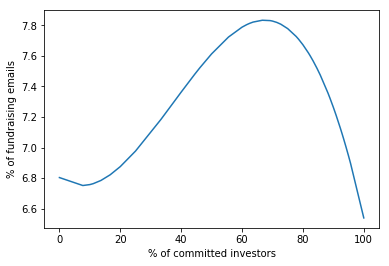

In [8]:
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 3))(np.unique(X)))
plt.xlabel('% of committed investors')
plt.ylabel('% of fundraising emails')
plt.savefig('experiments/founder_rank/images/email_over_decided.png')
plt.show()

In [9]:
datapoints = []
for founder in decided_over_weeks.data:
  for (week, decided) in founder:
    datapoints.append((week, decided))

X, Y = tuples_to_XY(datapoints)

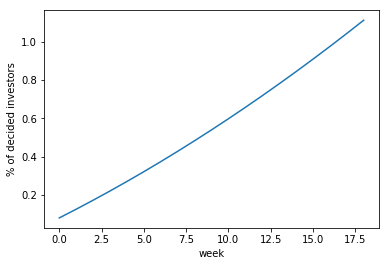

In [10]:
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 2))(np.unique(X)))
plt.xlabel('week')
plt.ylabel('% of decided investors')
plt.savefig('experiments/founder_rank/images/decided_over_weeks.png')
plt.show()

In [11]:
datapoints = []
for founder in email_over_decided_data.data:
  if len(founder) > 30:
    continue
  datapoints.append(len(founder))

15.240458015267176 3.436363216633863


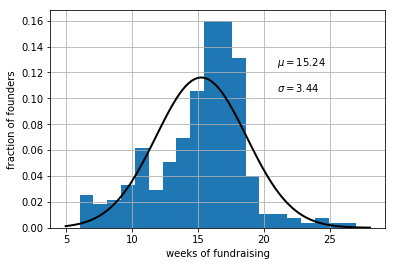

In [12]:
plt.hist(datapoints, 20, density=True)

mu, sigma = norm.fit(datapoints)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
print(mu, sigma)

plt.xlabel('weeks of fundraising')
plt.ylabel('fraction of founders')
plt.text(21, 0.125, '$\mu={0:.2f}$'.format(mu))
plt.text(21, 0.105, '$\sigma={0:.2f}$'.format(sigma))
plt.grid(True)

plt.savefig('experiments/founder_rank/images/weeks_hist.png')
plt.show()

In [25]:
datapoints = []
for (avg_sentiment, funding, interested) in sentiment.data:
  if not float(funding) or float(funding) > 10**6:
    continue
  datapoints.append((funding, avg_sentiment))

X, Y = tuples_to_XY(datapoints)

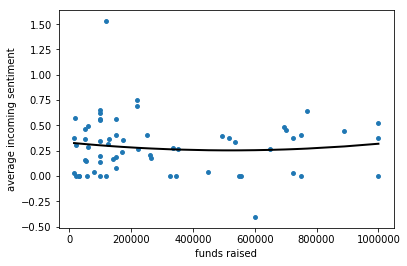

In [38]:
plt.scatter(X, Y, s=15)
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 2))(np.unique(X)), 'k', linewidth=2)
plt.xlabel('funds raised')
plt.ylabel('average incoming sentiment')
plt.savefig('experiments/founder_rank/images/sentiment_over_funding.png')
plt.show()

In [39]:
datapoints = []
for (avg_sentiment, funding, interested) in sentiment.data:
  if not float(interested) or float(interested) > 100:
    continue
  datapoints.append((interested, avg_sentiment))

X, Y = tuples_to_XY(datapoints)

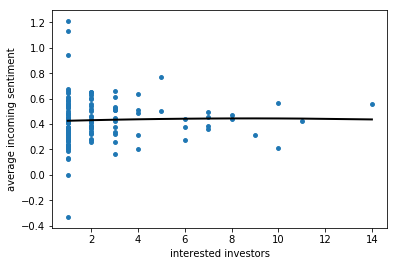

In [43]:
plt.scatter(X, Y, s=15)
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 2))(np.unique(X)), 'k', linewidth=2)
plt.xlabel('interested investors')
plt.ylabel('average incoming sentiment')
plt.savefig('experiments/founder_rank/images/sentiment_over_interested.png')
plt.show()